# ClaSP Visualization
In this notebook, we visualize ClaSS or competitors.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import ast
import Orange
import sys
sys.path.append("../")

from tqdm import tqdm

In [3]:
from src.visualizer import plot_profile_with_ts
from src.utils import load_dataset, load_benchmark_dataset

Let's load some score profiles.

In [75]:
dataset = "PAMAP"
df_data = load_dataset(dataset)
df_data

,name,window_size,change_points,time_series
0,PAMAP_Indoor_Subject1_IMU_Shoe_X-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[4.13, 4.17, 4.28, 4.21, 4.17, 4.24, 4.17, 4.2..."
1,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[9.03, 8.99, 8.88, 9.1, 8.88, 9.03, 8.99, 8.88..."
2,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Acc,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-0.06, 0.1, 0.17, 0.14, -0.06, 0.1, -0.02, 0...."
3,PAMAP_Indoor_Subject1_IMU_Shoe_X-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.02, -0.02, 0.02, 0.02, 0.03, -0.0, 0.02, -0..."
4,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.03, 0.01, -0.12, -0.03, -0.01, -0.0, -0.01,..."
5,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Gyro,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[0.0, 0.01, 0.03, -0.02, -0.02, -0.0, 0.01, 0...."
6,PAMAP_Indoor_Subject1_IMU_Shoe_X-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-18.27, -18.27, -18.27, -18.27, -18.27, -18.2..."
7,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-12.13, -12.13, -12.13, -12.13, -12.13, -12.1..."
8,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Mag,100,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[-27.27, -27.27, -27.27, -27.27, -27.27, -27.2..."
9,PAMAP_Indoor_Subject2_IMU_Shoe_X-Acc,100,"[17944, 36307, 59148, 82980, 101447, 110615, 1...","[5.67, 5.82, 5.78, 5.74, 5.67, 5.74, 5.82, 5.7..."


In [92]:
algorithm = "Window"
converters = dict([(column, eval) for column in ["profile", "true_cps", "found_cps"]])
df_profiles = pd.read_csv(f"../experiments/competitor_{dataset}/{algorithm}.csv", converters=converters)
df_profiles

,dataset,true_cps,found_cps,found_cps_dx,f1_score,covering_score,profile,runtimes
0,PAMAP_Indoor_Subject1_IMU_Shoe_X-Acc,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[71885, 81918, 82419, 82957, 83595, 84345, 854...","[72384, 82417, 82918, 83456, 84094, 84844, 859...",0.138,0.218,"[6.251841784725778e-05, 6.251841784725778e-05,...","[0.00017, 6e-05, 6e-05, 6e-05, 7e-05, 6e-05, 6..."
1,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Acc,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[55201, 81750, 82251, 82752, 83576, 86677, 871...","[55700, 82249, 82750, 83251, 84075, 87176, 876...",0.165,0.388,"[5.603426022497346e-05, 5.603426022497346e-05,...","[0.00019, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
2,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Acc,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[82043, 82602, 83103, 86714, 87363, 87924, 885...","[82542, 83101, 83602, 87213, 87862, 88423, 890...",0.169,0.238,"[0.0003039976881820637, 0.0003039976881820637,...","[0.00014, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
3,PAMAP_Indoor_Subject1_IMU_Shoe_X-Gyro,"[17124, 36563, 54372, 81321, 97438, 106170, 11...",[],[],0.200,0.136,"[1.0926186218867227e-05, 1.0926186218867227e-0...","[0.00014, 6e-05, 6e-05, 0.00263, 7e-05, 6e-05,..."
4,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Gyro,"[17124, 36563, 54372, 81321, 97438, 106170, 11...",[],[],0.200,0.136,"[1.0621862921986192e-05, 1.0621862921986192e-0...","[0.00021, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
5,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Gyro,"[17124, 36563, 54372, 81321, 97438, 106170, 11...",[],[],0.200,0.136,"[5.650392568399068e-06, 5.650392568399068e-06,...","[0.00027, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
6,PAMAP_Indoor_Subject1_IMU_Shoe_X-Mag,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[16627, 36563, 54363, 54868, 71549, 81294, 817...","[17126, 37062, 54862, 55367, 72048, 81793, 822...",0.341,0.695,"[0.0036960984921932116, 0.0036960984921932116,...","[0.00016, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
7,PAMAP_Indoor_Subject1_IMU_Shoe_Y-Mag,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[16649, 54358, 54868, 81817, 82577, 83078, 873...","[17148, 54857, 55367, 82316, 83076, 83577, 878...",0.400,0.659,"[1.2382970138238587e-06, 1.2382970138238587e-0...","[0.00018, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."
8,PAMAP_Indoor_Subject1_IMU_Shoe_Z-Mag,"[17124, 36563, 54372, 81321, 97438, 106170, 11...","[36564, 70362, 81310, 81811, 87644, 88356, 888...","[37063, 70861, 81809, 82310, 88143, 88855, 893...",0.400,0.469,"[0.0019408152205498963, 0.0019408152205498963,...","[0.0002, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6e..."
9,PAMAP_Indoor_Subject2_IMU_Shoe_X-Acc,"[17944, 36307, 59148, 82980, 101447, 110615, 1...","[74134, 77294, 83886, 84470, 87005, 88392, 889...","[74633, 77793, 84385, 84969, 87504, 88891, 894...",0.135,0.206,"[0.00014931402270486512, 0.0001493140227048651...","[0.00017, 6e-05, 6e-05, 6e-05, 6e-05, 6e-05, 6..."


<Figure size 432x288 with 0 Axes>

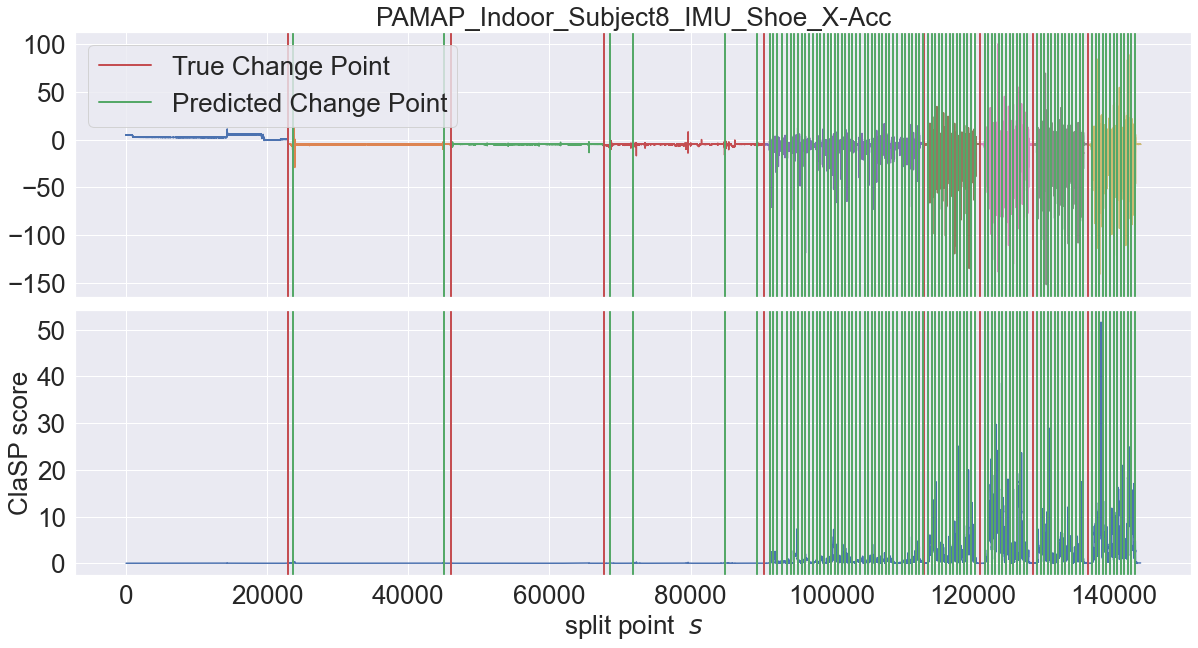

In [93]:
selection = 63

row = df_profiles.iloc[selection,:]
plot_profile_with_ts(row["dataset"], df_data.time_series.iloc[selection], np.array(row.profile), np.array(row.true_cps), np.array(row.found_cps), score="ClaSP score", show=False, save_path=None) # "../tmp/" + row["name"] + ".pdf"